# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Naufal Rahmatullah
- **Email:** mc253d5y0305@student.devacademy.id
- **ID Dicoding:** MC253D5Y0305

## Menentukan Pertanyaan Bisnis

- Bagaimana tren pemakaian sepeda antara tahun 2011 dan tahun 2012?
- Bagaimana pengaruh cuaca terhadap perkembangan bike sharing yang mungkin menjadi pendukung atau bahkan tantangan terhadap potensi market yang telah ditemukan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker

## Data Wrangling

### Gathering Data

In [3]:
fileDay = pd.read_csv("Dashboard\day.csv")
fileHour = pd.read_csv("Data\hour.csv")
print(fileDay)
print(fileHour)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19024\3449753464.py:1: SyntaxWarning: invalid escape sequence '\d'
  fileDay = pd.read_csv("Dashboard\day.csv")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19024\3449753464.py:2: SyntaxWarning: invalid escape sequence '\h'
  fileHour = pd.read_csv("Data\hour.csv")


**Insight:**
- dari file Day, dapat dilihat ada 8 kolom mulai dari instant, date, season, year, month, dan lainnya.
- dari file Hour, dapat dilihat ada 7 kolom, mulai dari weathersit, temp, attemp, dan lain lain.

### Assessing Data

Assess data file Day

In [4]:
fileDay.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari sisi missing value, tidak ditemukan pada file tersebut.

In [5]:
fileDay.duplicated().sum()

np.int64(0)

Dari sisi data yang terduplikasi juga tidak ada.


Assess data Hours

In [6]:
fileHour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
fileHour.duplicated().sum()

np.int64(0)

tidak ada juga terindikasi duplikasi data, jadi saya simpulkan data file dan hours bersih.

In [8]:
dfDay = pd.DataFrame(fileDay)
dfHour = pd.DataFrame(fileHour)
dfDay.info()
dfHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [9]:
dfDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
Setelah di cek saya tidak menemukan data yang terduplikasi ataupun missing value, namun terdapat ketidak sesuaian tipe data pada kolom dteday yang awalnya object menjadi datetime

**Insight:**
Karena dari kedua tabel tersebut hanya ada satu perbedaan yaitu pada kolom hr pada dataframe hours, maka saya memutuskan untuk menyatukannya menjadi satu tabel.

### Cleaning Data

In [10]:
dfDay['mnth'] = dfDay['mnth'].map({
    1:'January', 2:'February', 3:'March', 4:'April',
    5:'May', 6:'June', 7:'July', 8:'August',
    9:'September', 10:'October', 11:'November', 12:'December'
})
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

dfDay['mnth'] = pd.Categorical(dfDay['mnth'], categories=month_order, ordered=True)


Memberikan Penamaan bulan, serta kondisi cuaca, musim

In [11]:
dfDay['season'] = dfDay['season'].map({
    1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}).astype('category')

dfDay['weekday'] = dfDay['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}).astype('category')

dfDay['holiday'] = dfDay['holiday'].map({
    0: 'No', 1: 'Yes'
}).astype('category')

dfDay['workingday'] = dfDay['workingday'].map({
    0: 'No', 1: 'Yes'
}).astype('category')
dfDay['weathersit'] = dfDay['weathersit'].map({
    1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}).astype('category')

print(dfDay[['weekday', 'holiday', 'weathersit']].dtypes)

print(dfDay['season'].dtype)

weekday       category
holiday       category
weathersit    category
dtype: object
category


Lalu pemberian penamaan pada setiap tipe data pada kolom season, weekday, holiday, dan weathersit untuk mengirangi kebingungan.

In [12]:
dfDay = dfDay.drop(columns = ['hum','windspeed'])
dfDay.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,No,Saturday,No,Mist,0.344167,0.363625,331,654,985
1,2,2011-01-02,Winter,0,January,No,Sunday,No,Mist,0.363478,0.353739,131,670,801
2,3,2011-01-03,Winter,0,January,No,Monday,Yes,Clear,0.196364,0.189405,120,1229,1349
3,4,2011-01-04,Winter,0,January,No,Tuesday,Yes,Clear,0.200000,0.212122,108,1454,1562
4,5,2011-01-05,Winter,0,January,No,Wednesday,Yes,Clear,0.226957,0.229270,82,1518,1600


**Insight:**
Kegiatan cleaning drop kolom hum dan windspeed karena tidak berkaitan dengan pertanyaan bisnis

## Exploratory Data Analysis (EDA)

### Explore data untuk mengelompokkan kegunaan sepeda berdasarkan hari


In [13]:
holiday_data = dfDay[dfDay['holiday'] == 'Yes'].groupby('mnth')['cnt'].sum()
workingday_data = dfDay[dfDay['holiday'] == 'No'].groupby('mnth')['cnt'].sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19024\2572567525.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_data = dfDay[dfDay['holiday'] == 'Yes'].groupby('mnth')['cnt'].sum()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19024\2572567525.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_data = dfDay[dfDay['holiday'] == 'No'].groupby('mnth')['cnt'].sum()


Data diatas adalah clustering dari merged_df guna mengelompokkan pengguna yang memakai sepeda saat workingday dan holiday saja.

In [14]:
mist_data = dfDay[dfDay['weathersit'] == 'Mist'].groupby('mnth')['cnt'].sum()
clear_data = dfDay[dfDay['weathersit'] == 'Clear'].groupby('mnth')['cnt'].sum()
lightrain_data = dfDay[dfDay['weathersit'] == 'Light Rain/Snow'].groupby('mnth')['cnt'].sum()
Heavyrain_data = dfDay[dfDay['weathersit'] == 'Heavy Rain/Snow'].groupby('mnth')['cnt'].sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19024\2062603354.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mist_data = dfDay[dfDay['weathersit'] == 'Mist'].groupby('mnth')['cnt'].sum()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19024\2062603354.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clear_data = dfDay[dfDay['weathersit'] == 'Clear'].groupby('mnth')['cnt'].sum()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19024\2062603354.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

Data diatas adalah hasil dari deklarasi 4 variabel yang tujuannya untuk mengelompokkan user yang menggunakan sepeda tergantung cuacanya.

In [15]:
dataHolidayUser = dfDay[dfDay['holiday'] == 'Yes'][['dteday', 'casual', 'registered']]
print(dataHolidayUser)

         dteday  casual  registered
16   2011-01-17     117         883
51   2011-02-21     195         912
104  2011-04-15     642        2484
149  2011-05-30    1549        2549
184  2011-07-04    3065        2978
247  2011-09-05    1236        2115
282  2011-10-10    1514        3603
314  2011-11-11     440        2928
327  2011-11-24     560         935
359  2011-12-26     430         887
366  2012-01-02     244        1707
380  2012-01-16     217        2081
415  2012-02-20     502        2627
471  2012-04-16    1198        5172
513  2012-05-28    2557        3486
550  2012-07-04    2562        4841
611  2012-09-03    1965        4069
646  2012-10-08     874        4604
681  2012-11-12    1097        5172
691  2012-11-22     955        1470
724  2012-12-25     440         573


In [16]:

dataHolidayUser['total_users'] = dataHolidayUser['casual'] + dataHolidayUser['registered']
totalHolidayUser = dataHolidayUser['total_users'].sum()
print("Total seluruh pengguna selama hari libur:", totalHolidayUser)


Total seluruh pengguna selama hari libur: 78435


dapat dilihat diatas tempo tertentu memiliki jumlah user diatas 1000, maka saya akan identifikasi dibulan apa saja.

In [17]:
dataWorkingdayUser = dfDay[dfDay['workingday'] == 'Yes'][['dteday', 'casual', 'registered']]
print(dataWorkingdayUser)

         dteday  casual  registered
2    2011-01-03     120        1229
3    2011-01-04     108        1454
4    2011-01-05      82        1518
5    2011-01-06      88        1518
6    2011-01-07     148        1362
..          ...     ...         ...
723  2012-12-24     174         746
725  2012-12-26       9         432
726  2012-12-27     247        1867
727  2012-12-28     644        2451
730  2012-12-31     439        2290

[500 rows x 3 columns]


In [18]:

dataWorkingdayUser['total_users'] = dataWorkingdayUser['casual'] + dataWorkingdayUser['registered']
totalWorkingUsers = dataWorkingdayUser['total_users'].sum()
print("Total seluruh pengguna selama hari kerja:", totalWorkingUsers)


Total seluruh pengguna selama hari kerja: 2292410


In [19]:
dfDay.groupby('mnth')[['cnt']].agg(['max', 'min', 'mean', 'sum']) \
     .sort_values(('cnt', 'mean'), ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19024\1998877718.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfDay.groupby('mnth')[['cnt']].agg(['max', 'min', 'mean', 'sum']) \


cnt                           
            max   min         mean     sum
mnth                                      
June       8120  3767  5772.366667  346342
September  8714  1842  5766.516667  345991
August     7865  1115  5664.419355  351194
July       8173  3285  5563.677419  344948
May        8294  2633  5349.774194  331686
October    8156    22  5199.225806  322352
April      7460   795  4484.900000  269094
November   6852  1495  4247.183333  254831
March      8362   605  3692.258065  228920
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933

In [20]:
dataHolidayUser = dfDay[dfDay['holiday'] == 'Yes'][['dteday', 'casual', 'registered']]
dataHolidayUser['total_users'] = dataHolidayUser['casual'] + dataHolidayUser['registered']

In [21]:
meanAllUsers = dfDay['cnt'].mean()
print("Rata-rata total pengguna:", meanAllUsers)

Rata-rata total pengguna: 4504.3488372093025


**Insight:**
- setelah melakukan pengumpulan data mengenai perbandingan saat user memakai bike disaat holiday atau workingday dapat disimpulkan saat workingday penggunaan lebih tinggi.
- setelah melakukan penghitungan rata rata dari seluruh jumlah user, dapat ditemukan jarak waktu kapan user akan memakai bike

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa hubungan dari kepentingan user terhadap pemakaian Bike Sharing?


In [22]:
data2011 = dfDay[dfDay['yr'] == 0].groupby('mnth')['cnt'].sum()
data2012 = dfDay[dfDay['yr'] == 1].groupby('mnth')['cnt'].sum()
data2011 = data2011.sort_index()
data2012 = data2012.sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19024\1816534137.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data2011 = dfDay[dfDay['yr'] == 0].groupby('mnth')['cnt'].sum()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19024\1816534137.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data2012 = dfDay[dfDay['yr'] == 1].groupby('mnth')['cnt'].sum()


In [23]:
data2011 = data2011.sort_index()
data2012 = data2012.sort_index()

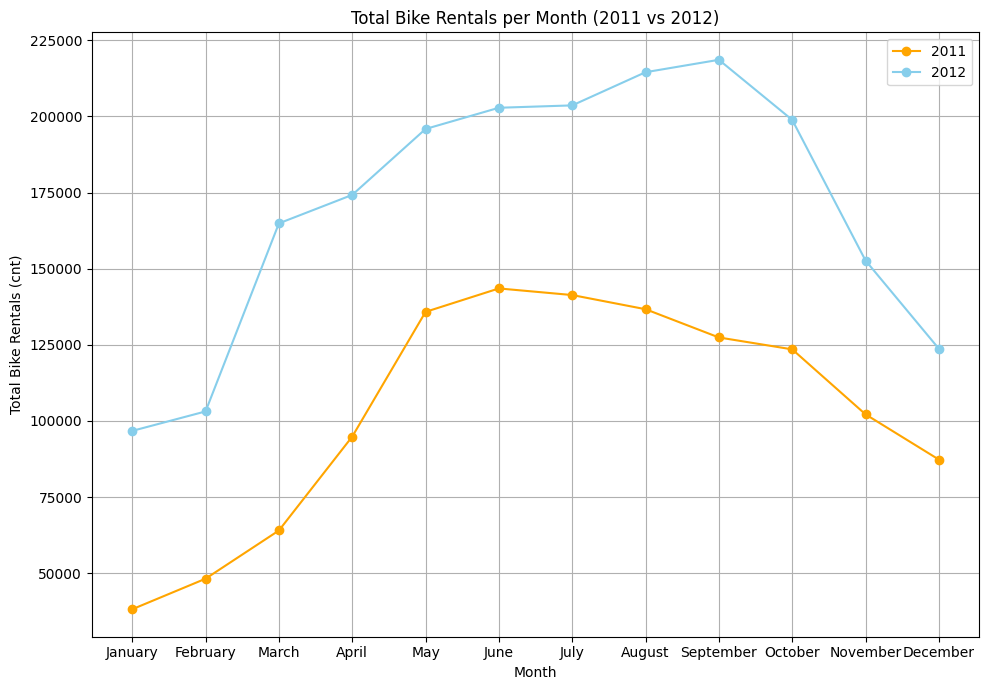

In [24]:
plt.figure(figsize=(10, 7))

plt.plot(data2011.index, data2011.values, label='2011', marker='o', color='orange')
plt.plot(data2012.index, data2012.values, label='2012', marker='o', color='skyblue')

plt.grid(True)
plt.title('Total Bike Rentals per Month (2011 vs 2012)')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals (cnt)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.ticklabel_format(axis='y',style='plain',scilimits=(0,0))
plt.show()


In [25]:
dataUserSeptermber = dfDay[(dfDay['mnth'] == 'September')&(dfDay['yr'] == 1)][['dteday', 'casual', 'registered']]
dataUserSeptermber['total_users'] = dataUserSeptermber['casual'] + dataUserSeptermber['registered']
totalUserSeptember = dataUserSeptermber['total_users'].sum()
print("Total seluruh pengguna selama bulan september:", totalUserSeptember)

dataUserJanuary = dfDay[(dfDay['mnth'] == 'January')&(dfDay['yr'] == 0)][['dteday', 'casual', 'registered']]
dataUserJanuary['total_users'] = dataUserJanuary['casual'] + dataUserJanuary['registered']
totalUserSeptember = dataUserJanuary['total_users'].sum()
print("Total seluruh pengguna selama bulan september:", totalUserSeptember)


Total seluruh pengguna selama bulan september: 218573
Total seluruh pengguna selama bulan september: 38189


Setelah visualisasi keduanya, saya akan membandingkannya dengan cara menyatukannya.

**Insight:**
- setelah melakukan pengelompokkan data berdasarkan tahunnya, dapat disimpulkan tren tersebut naik jika dibandingkan dengan tahun sebelumnya.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap perkembangan bike sharing yang mungkin menjadi pendukung atau bahkan tantangan terhadap potensi market yang telah ditemukan?

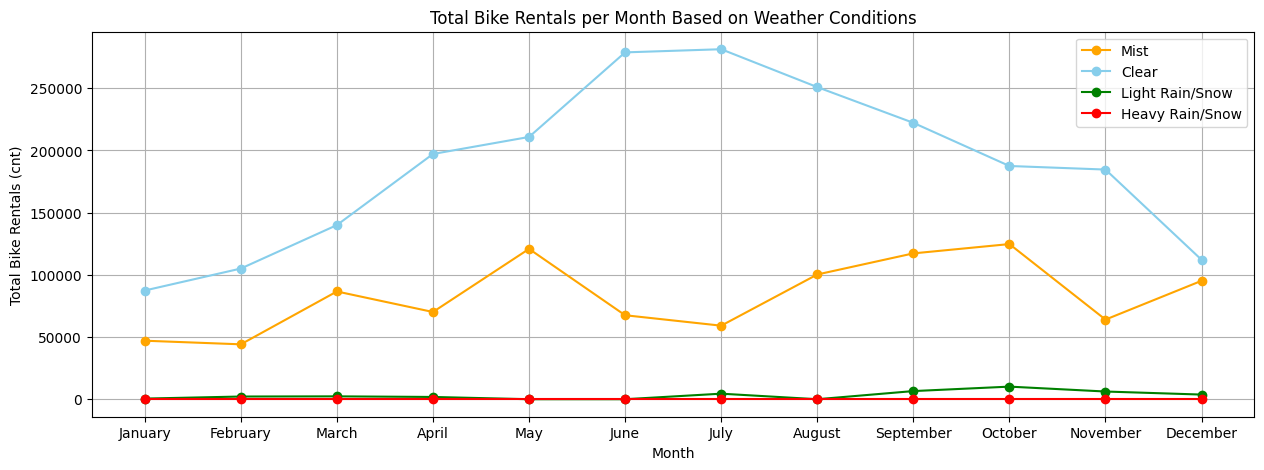

In [26]:
plt.figure(figsize=(15, 5))

plt.plot(mist_data.index, mist_data.values, label='Mist', marker='o', color='orange')
plt.plot(clear_data.index, clear_data.values, label='Clear', marker='o', color='skyblue')
plt.plot(lightrain_data.index, lightrain_data.values, label='Light Rain/Snow', marker='o', color='green')
plt.plot(Heavyrain_data.index, Heavyrain_data.values, label='Heavy Rain/Snow', marker='o', color='red')

plt.grid(True)

plt.title('Total Bike Rentals per Month Based on Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals (cnt)')
plt.ticklabel_format(axis='y',style='plain',scilimits=(0,0))
plt.legend()

plt.show()

Text(0, 0.5, 'total user')

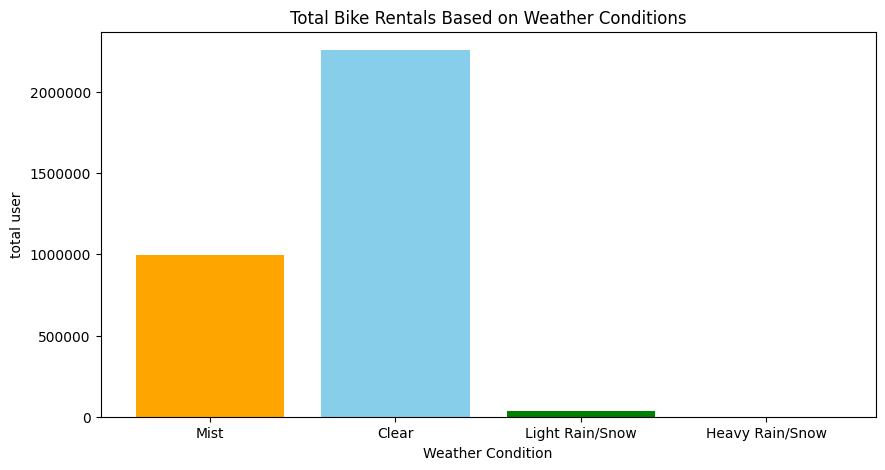

In [27]:
weather_data = {
    'Mist': mist_data.sum(),
    'Clear': clear_data.sum(),
    'Light Rain/Snow': lightrain_data.sum(),
    'Heavy Rain/Snow': Heavyrain_data.sum(),
}

# Creating a bar chart
plt.figure(figsize=(10, 5))
plt.ticklabel_format(axis='y',style='plain',scilimits=(0,0))
plt.bar(weather_data.keys(), weather_data.values(), color=['orange', 'skyblue', 'green', 'red'])

# Adding labels and title
plt.title('Total Bike Rentals Based on Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('total user')

**Insight:**
- Perbandingan di grafik tersebut memperlihatkan betapa kontrasnya perbedaan pengguna saat cuaca Clear, lightrain, dan heavyrain.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Tren Penggunaan Sepeda (2011 vs 2012): Setelah melakukan clustering terhadap data pengguna sepeda pada tahun 2011 dan 2012, dapat dilihat bahwa pengguna tertinggi adalah bulan september 2012 di angka 5245752 pengguna. bahwa dapat  Bulan penggunaan terendah juga terletak pada awal tahun. Yaitu bulan januari tahun 2011 di angka 870969 pengguna. Hal ini menunjukkan bahwa sepeda menjadi pilihan transportasi yang semakin populer di tahun berikutnya, yang mungkin disebabkan oleh faktor-faktor seperti peningkatan kesadaran akan gaya hidup sehat, kemudahan mobilitas, dan kebijakan yang mendukung penggunaan sepeda di kota-kota besar
- Conclution pertanyaan 2: Berdasarkan analisis pengaruh cuaca terhadap penggunaan sepeda, terlihat bahwa cuaca cerah (Clear) memiliki pengaruh yang sangat signifikan terhadap tingginya penggunaan sepeda. Bulan September menunjukkan lonjakan drastis dalam penggunaan sepeda, dibandingkan dengan bulan November yang cenderung lebih rendah, terutama saat cuaca sedikit hujan atau hujan deras. Hal ini menyoroti tantangan terbesar bagi penyedia layanan bike-sharing, yaitu pengaruh cuaca yang kurang mendukung, di mana penggunaan sepeda menjadi jauh lebih sedikit saat cuaca buruk. Grafik yang menunjukkan penggunaan sepeda selama cuaca cerah dan hujan menunjukkan perbedaan yang jelas, dengan grafik hijau dan oranye yang mencerminkan penurunan penggunaan saat cuaca hujan.